# Confidence Intervals and Hypothesis Testing

In the next two lessons we are going to expand upon the idea of Confidence Intervals that we saw as an example of how the CLT is used. Along the way we are going to explore more generally how point estimators are used, and deal with one of the sticky parts we saw in our last class - what can we do if we do not know the variance of the distribution we are sampling from?

Finally we will then flip the construction around and show that we can use it to set up a process for making conclusions about the statistics of our distribution computed from the sample we have found.


## Point Estimators

An estimator is a rule for computing an a parameter for the underlying population from a sample that has been collected. In our class we explored the estimator $\bar{Y}$ for the population mean $\mu$ in great detail. $\bar{Y}$ is an example of a *point estimator* and then the confidence itnerval we computed is an example of another type of estimator. Any parameter describing the distribution is suitable to find estimators for and we will give some common ones below. 

### Example

As an example though. Let $Y$ be the uniform random variable on the interval $[0, a]$. That is $Y$ has PDF:

$$ f(x) = \left\{ \begin{matrix} x/a & x \in [0, a] \\ 0 & \mbox{otherwise} \end{matrix} \right. $$

The problem being that we do not know what $a$ is. Suppose that we can sample from our distribution, so we collect a sample and find $1, 1.5, 2, 2, 2.3, 3.2$.

What do we think $a$ is?  Can we find an estimate for it?

### Biased Estimators 

Suppose that $\hat{\theta}$ is a point estimator for $\theta$. We say that $\hat{\theta}$ is biased if $E(\hat{\theta}) \neq \theta$.  

The Mean Square Error of an estimator is given by:
$$ MSE(\hat{\theta}) = E( (\hat{\theta} - \theta)^2 ) $$

and there are two components to it. There is the underlying error caused by the random variation in the sampling procedure $V(\hat{\theta})$ and then there is error caused by the bias:

$$ MSE(\hat{\theta}) = V(\hat{\theta}) + ( B(\hat{\theta}) )^2 $$

#### Example $\bar{Y}$

$\bar{Y}$ is an unbiased estimator for $\mu$.

#### Example $S$

We are now in a position to explain why our sample variance is different from what we might expect:

Let $Y_1, Y_2, \dots, Y_n$ be a random sample with mean $\mu$ and variance $\sigma^2$:

$$ S'^2 = \frac{1}{n} \sum (Y_i - \bar{Y})^2 $$ 

is **NOT** the sample variance, however it is an estimator for the population variance. It is however biased:

$$ E(S'^2) = \frac{1}{n} E( \sum (Y_i - \bar{Y})^2) = \frac1n E(\sum Y_i^2) - E(\bar{Y}^2) = \sum  \frac{1}{n} E(Y_i^2) - E(\bar{Y}^2) $$

We have that 

$$ E(Y_i^2) = V(Y_i) + E(Y_i)^2 = \sigma^2 + \mu^2 $$ and that 

$$ E(\bar{Y}^2) = V(\bar{Y}) + E( \bar{Y})^2 = \sigma^2 / n + \mu^2 $$

Putting it all together we have:

$$ E(S'^2) = \frac1n \sum_{i=1}^n (\sigma^2 + \mu^2) - \frac{\sigma^2}{n} - \mu^2 = \sigma^2 - \frac{1}{n} \sigma^2  $$

We can turn this into an unbiased estimator of $\sigma^2$ by multiplying it by the factor $\frac{n}{n-1}$ giving our definition of sample variance:

$$ S^2 = \frac{1}{n-1} \sum (Y_i - \bar{Y})^2 $$

### Common Point Estimators

Common unbiased point estimators we will use, together with their standard errors are:

#### Single Normal Distribution

To estimate $\mu$ we will use $\bar{Y}$. The standard error is $\sigma/\sqrt{n}$ where $\sigma^2$ is the variance of the distribution. 

#### Single Bernouli Trial

To estimate $p$ the probability of success in an individual trial we use $\hat{p} = \frac{Y}{n} $ the proportion of success in our sample of size n. The standard erorr is $\sqrt{p (1-p){n} } $.

#### Two Normal Distributions

To estimate $\mu_1 - \mu_2$ the difference in the means of two populations, we use $\bar{Y}_1 - \bar{Y}_2$ the differences in the means of samples from the two population of size $n_1$ and $n_2$. The standard error is then: 

$$ \sqrt{ \frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2} } $$

#### Two Bernouli Trials

To estimate $p_1 - p_2$ the differences in the probability of success in individual trials we use $\hat{p_1} - \hat{p_2}$ the differences of the proportions of success in two samples of size $n_1$ and $n_2$. The standard error is then:

$$ \sqrt{ \frac{p_1 (1-p_1)}{n_1} + \frac{ p_2 (1-p_2) }{n_2 } } $$




#### Chi-squared Distributions

Before we go on let's deal with a problem we have put off for a bit. Frequently we will not have a known value for $\sigma^2$ that appears in the results above. We can use $S^2$ the sample variance instead, however because it depends on the sample, it is itself a random variable (we showed above that it is unbiased estimator for the population variance.  Without proof we offer here that the expression:

$$ \frac{(n-1) S^2}{\sigma^2} $$ 

satisfies what is known as the $\chi^2$ distribution with $(n-1)$ degrees of freedom. This is a special case of a gamma distribution (note the support is $(0, \infty)$.  A graph of the PDF and CDF are below.


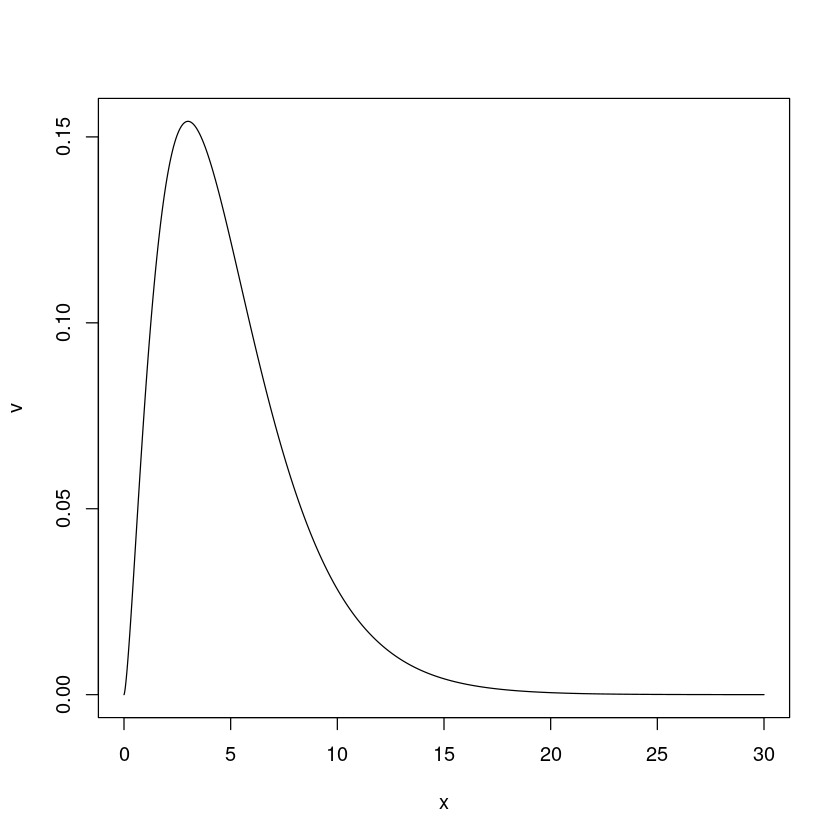

In [7]:
n <- 100
df <- 5
x <- c(0:(30*n))/n
v <- dchisq(x, df)
plot(x, v, type='l')

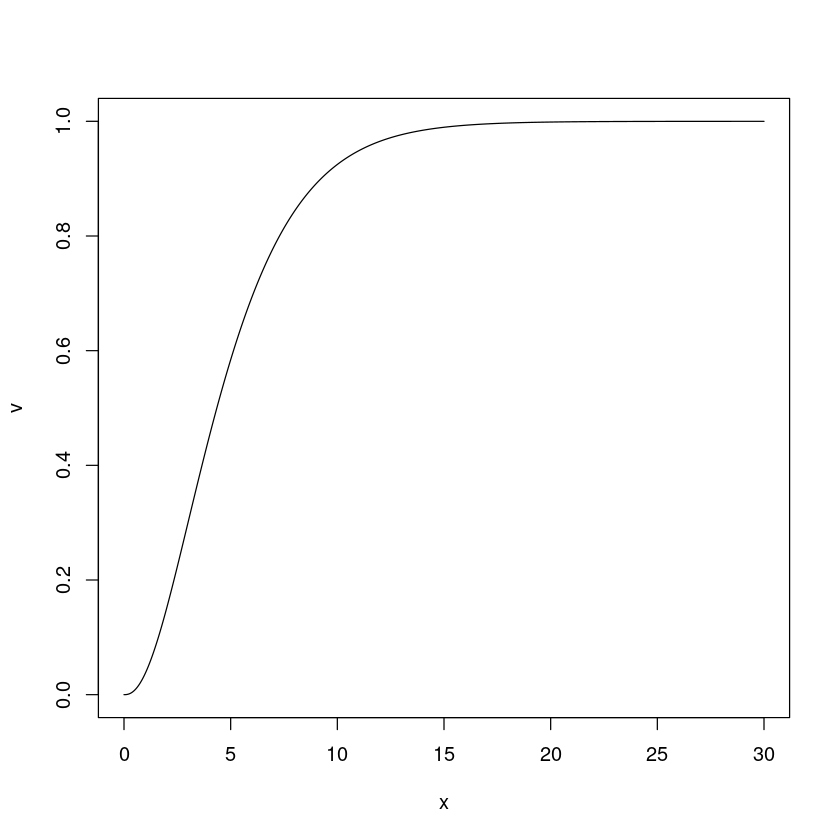

In [8]:
v <- pchisq(x, df)
plot(x, v, type='l')

The degrees of freedom parameter is the size of our sample minus 1. Experiment a bit with it to see how the distribution changes as this parameter changes.

#### t-Distributions

We will only occasionally use the $\chi^2$ distribution, mainly when we want to construct confidence intervals for our estimates of $\sigma^2$. However the result we do need is that if $Z$ is a standard normal random variable and $W$ is a $\chi^2$ distributed variable with $\nu$ degrees of freedom, then if the $Z$ and $W$ are independent we will have

$$ T = \frac{Z}{\sqrt{W/\nu}} $$

is said to have a t-distribution with $\nu$ degrees of freedom. 

What this means for us, because $\bar{Y}$ and $S^2$ are independent is:

$$ T = \sqrt{n} \frac{\bar{Y} - \mu}{S} $$

satisfies a t-distribution. Graphs of the PDF and CDF for a t-dsitribution are below. Note that as the degrees of freedom increases the t-distribution approaches the normal distribution.




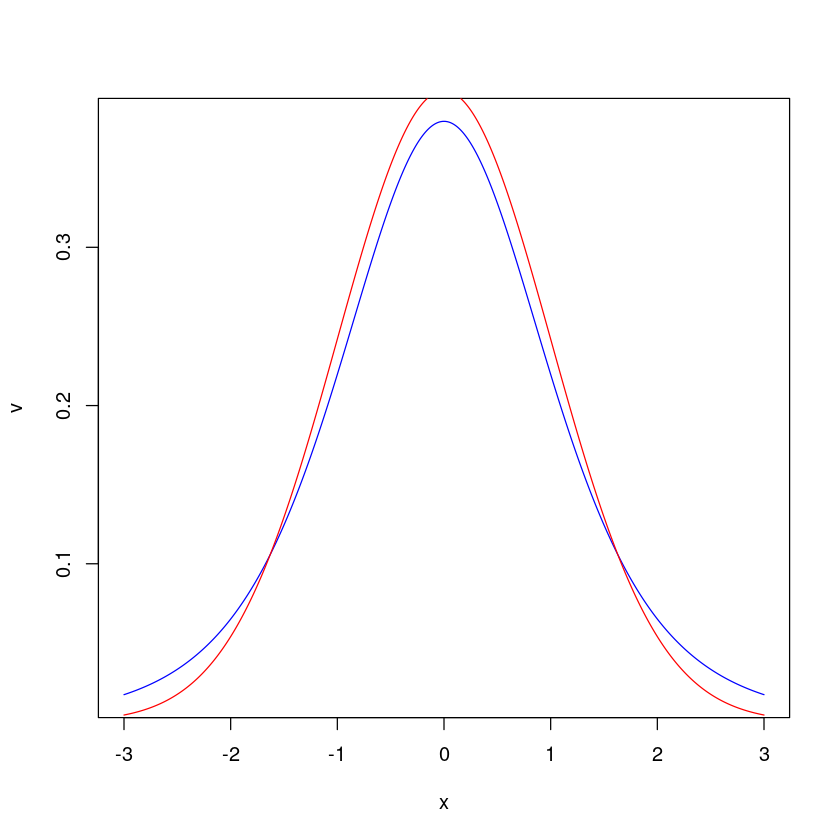

In [12]:
m <- 100
x <- c((-3*m):(3*m))/m
df <- 5
v <- dt(x, df)
v2 <- dnorm(x, 0, 1)
plot(x, v, type='l', col='blue')
lines(x, v2, col='red')

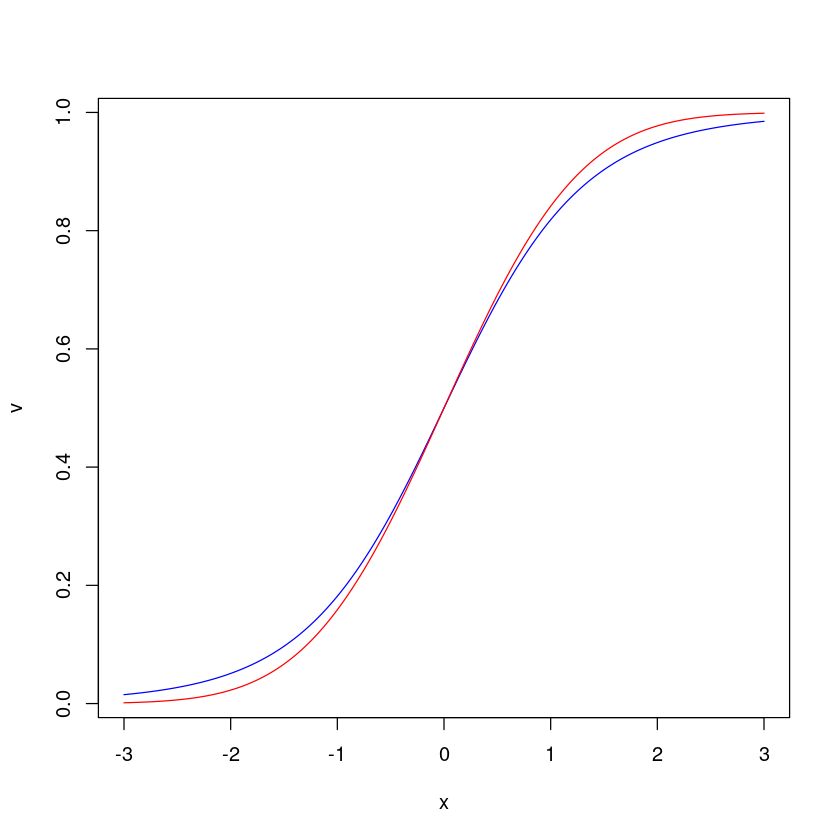

In [14]:
m <- 100
x <- c((-3*m):(3*m))/m
df <- 5
v <- pt(x, df)
v2 <- pnorm(x, 0, 1)
plot(x, v, type='l', col='blue')
lines(x, v2, col='red')

#### F Distributions

There is one final distribution connected to the issue of sample variance that we should discuss:  If $W_1$ and $W_2$ are two $\chi^2$ distributed variables with $\nu_1$ and $\nu_2$ degrees of freedom respectively then their ratio:

$$ F = \frac{W_1 / \nu_1}{ W_2 / \nu_2} $$

satisfies a distribution called the $F$-distribution with $\nu_1$ numerator degrees of freedom and $\nu_2$ denominator degrees of freedom. The PDF and CDF are given:

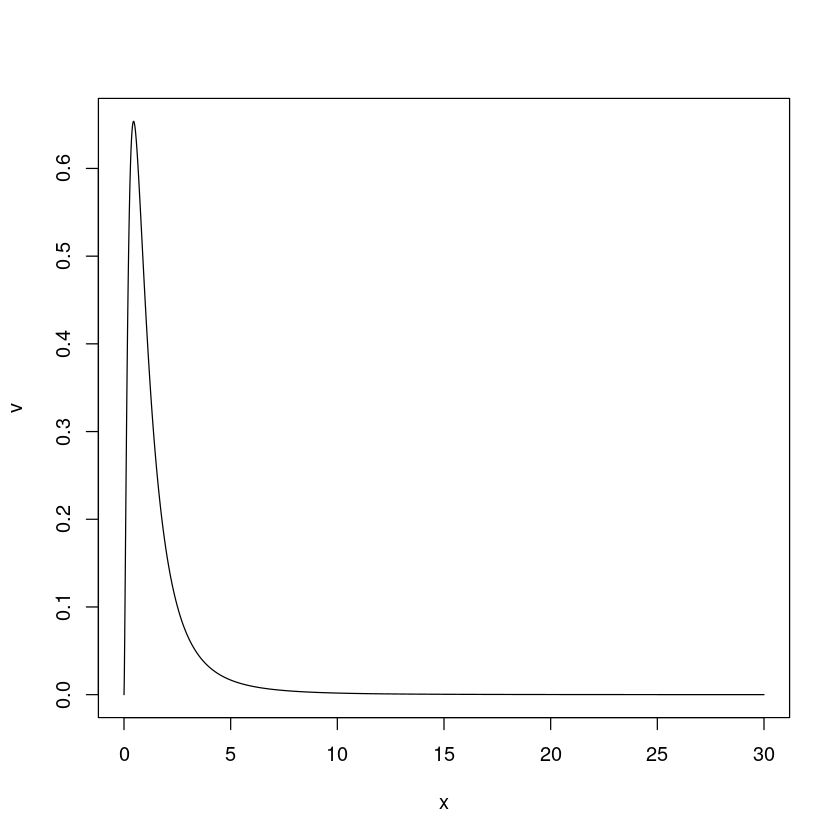

In [16]:
n <- 100
df1 <- 5
df2 <- 6
x <- c(0:(30*n))/n
v <- df(x, df1, df2)
plot(x, v, type='l')

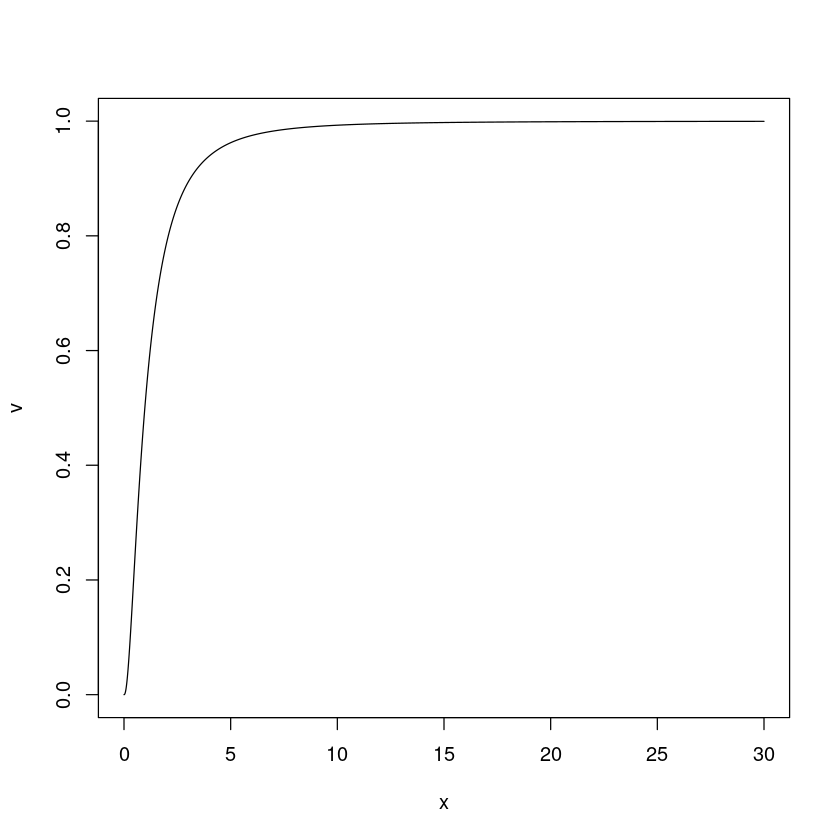

In [17]:
v <- pf(x, df1, df2)
plot(x, v, type='l')

## Confidence Intervals for the Mean

## Hypothesis Tests for the Mean

## General Confidence Intervals and Hypothesis Tests

